In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import orjsonl
import numpy as np

In [21]:
all_values = []
datas = []


names = [
    "Beam Search",
    "cg-MCTS (exp 0.5)",
    "cg-MCTS (exp 1.0)",
    "cg-MCTS (exp 2.0)",
    "cg-MCTS (exp 3.0)",
    "Nucleus Sampling",
    "Diverse beam",
    "rw-MCTS (exp 0.5)",
    "rw-MCTS (exp 1.0)",
    "rw-MCTS (exp 2.0)",
    "rw-MCTS (exp 3.0)",
    "Stochastic beam",
]
model_order = [
    "Nucleus Sampling",
    "Beam Search",
    "Diverse beam",
    "Stochastic beam",
    # "cg-MCTS (exp 0.5)",
    "cg-MCTS (exp 1.0)",
    # "cg-MCTS (exp 2.0)",
    "cg-MCTS (exp 3.0)",
    # "rw-MCTS (exp 0.5)",
    "rw-MCTS (exp 1.0)",
    # "rw-MCTS (exp 2.0)",
    "rw-MCTS (exp 3.0)",
]
for name, data in zip(
    names, orjsonl.load("../../../output/tgts-aesthetic.jsonl", "rb")
):
    datas.extend((name, d) for d in data)
    all_values.extend(data)

all_values = np.array(all_values)
df = pd.DataFrame(datas, columns=["model", "aesthetic_score"])
print(df)
print(df["aesthetic_score"].min(), df["aesthetic_score"].max())

                 model  aesthetic_score
0          Beam Search         6.718750
1          Beam Search         6.007812
2          Beam Search         6.546875
3          Beam Search         5.574219
4          Beam Search         5.757812
...                ...              ...
12283  Stochastic beam         6.125000
12284  Stochastic beam         5.851562
12285  Stochastic beam         6.253906
12286  Stochastic beam         5.675781
12287  Stochastic beam         6.207031

[12288 rows x 2 columns]
3.697265625 7.87890625


In [22]:
min = df["aesthetic_score"].min()
max = df["aesthetic_score"].max()
std = df["aesthetic_score"].std()
mean = df["aesthetic_score"].mean()

# df["aesthetic_score"] = (df["aesthetic_score"] - mean) / std

In [23]:
y_scale = 1.0
box_scale = 0.7

C:\Users\apoll\AppData\Local\Temp\ipykernel_114136\2513021023.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantiles = df_sorted.groupby("model")["aesthetic_score"].quantile(
C:\Users\apoll\AppData\Local\Temp\ipykernel_114136\2513021023.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df_sorted.groupby("model")["aesthetic_score"].mean()
C:\Users\apoll\AppData\Local\Temp\ipykernel_114136\2513021023.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ado

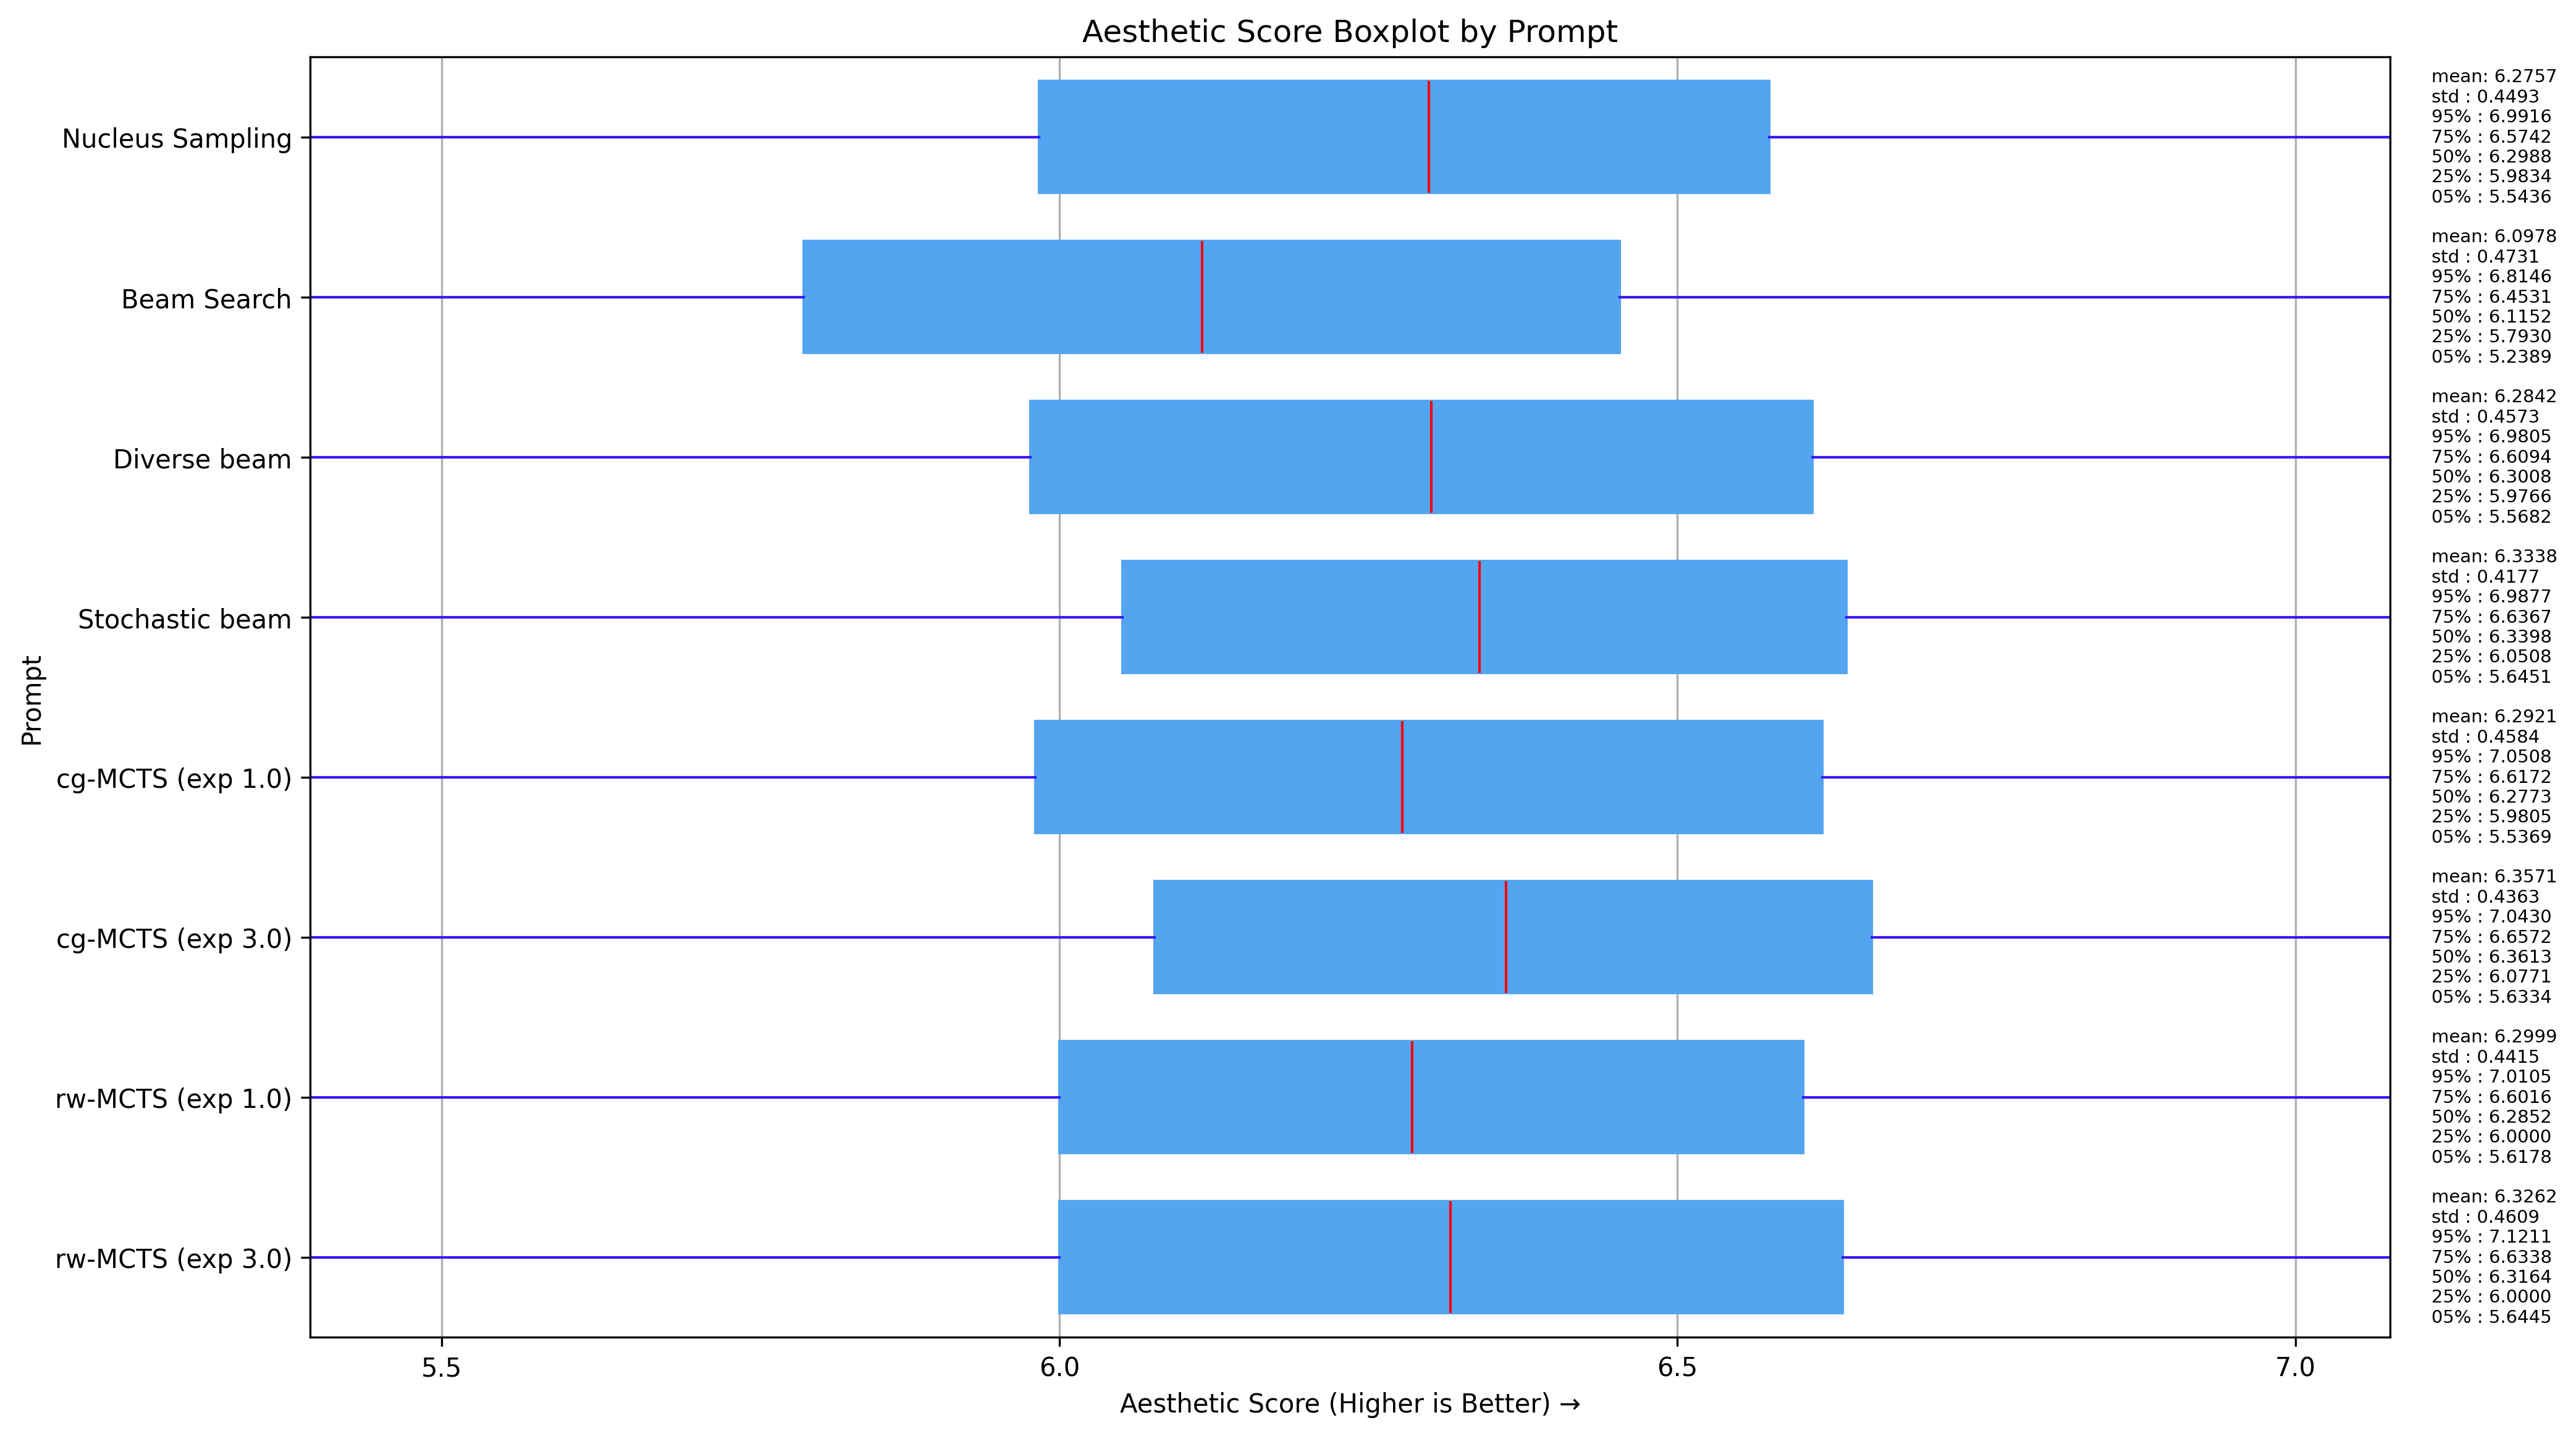


Quantiles for each model:
model                  
rw-MCTS (exp 3.0)  0.05    5.644531
                   0.25    6.000000
                   0.50    6.316406
                   0.75    6.633789
                   0.95    7.121094
rw-MCTS (exp 1.0)  0.05    5.617773
                   0.25    6.000000
                   0.50    6.285156
                   0.75    6.601562
                   0.95    7.010547
cg-MCTS (exp 3.0)  0.05    5.633398
                   0.25    6.077148
                   0.50    6.361328
                   0.75    6.657227
                   0.95    7.042969
cg-MCTS (exp 1.0)  0.05    5.536914
                   0.25    5.980469
                   0.50    6.277344
                   0.75    6.617188
                   0.95    7.050781
Stochastic beam    0.05    5.645117
                   0.25    6.050781
                   0.50    6.339844
                   0.75    6.636719
                   0.95    6.987695
Diverse beam       0.05    5.568164
             

In [24]:
# Calculate statistics for sorting
df_stats = (
    df.groupby("model")
    .agg({"aesthetic_score": ["mean", lambda x: x.mean()]})
    .reset_index()
)
df_stats.columns = ["model", "mean", "aesthetic_score"]

# Choose sorting method (uncomment the desired method)
# df_stats_sorted = df_stats.sort_values('median', ascending=False)
df_stats_sorted = df_stats.sort_values("mean", ascending=False)

# Sort the original dataframe based on the stats
df_sorted = df.set_index("model").loc[model_order].reset_index()
# print(df_stats)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

df_sorted["model"] = pd.Categorical(
    df_sorted["model"],
    categories=reversed(list(df_sorted["model"].unique())),
    ordered=True,
)
positions = [i * y_scale for i in range(len(model_order))]
# Create the horizontal boxplot using the sorted data
boxplot = df_sorted.boxplot(
    column="aesthetic_score",
    by="model",
    vert=False,
    ax=ax,
    patch_artist=True,
    medianprops={"color": "red"},
    showfliers=False,
    color={
        "boxes": "#54A5F0",
        "whiskers": "#4016F5",
        "medians": "red",
        "caps": "black",
    },
    positions=positions,
    widths=[box_scale] * len(model_order),
)

# Customize the plot
ax.set_title("Aesthetic Score Boxplot by Prompt")
ax.set_ylabel("Prompt")
ax.set_xlabel("Aesthetic Score (Higher is Better) →")

# Remove the automatically generated suptitle
plt.suptitle("")

# Adjust the y-axis tick labels
plt.yticks(rotation=0)

# Adjust the data range and tick marks
min_score = df["aesthetic_score"].min()
max_score = df["aesthetic_score"].max()

# Calculate and add quantile information
quantiles = df_sorted.groupby("model")["aesthetic_score"].quantile(
    [0.05, 0.25, 0.5, 0.75, 0.95]
)
reverse_map = {
    v1: v2
    for v1, v2 in zip(
        df_sorted["model"].unique(), reversed(df_sorted["model"].unique())
    )
}
ax.set_xlim(mean - 1.75 * std, mean + 1.75 * std)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))

means = df_sorted.groupby("model")["aesthetic_score"].mean()
std = df_sorted.groupby("model")["aesthetic_score"].std()

# print(quantiles)
for i, model in enumerate(df_sorted["model"].unique()):
    model = reverse_map[model]
    quantile_text = (
        f"mean: {means.loc[model]:.4f}\n"
        f"std : {std.loc[model]:.4f}\n"
        f"95% : {quantiles.loc[model, 0.95]:.4f}\n"
        f"75% : {quantiles.loc[model, 0.75]:.4f}\n"
        f"50% : {quantiles.loc[model, 0.50]:.4f}\n"
        f"25% : {quantiles.loc[model, 0.25]:.4f}\n"
        f"05% : {quantiles.loc[model, 0.05]:.4f}"
    )
    ax.annotate(
        quantile_text,
        xy=(1.02, i * y_scale),
        xycoords=("axes fraction", "data"),
        va="center",
        ha="left",
        fontsize=7,
    )

# Display the plot
plt.tight_layout()
plt.show()

# Log quantile information
print("\nQuantiles for each model:")
print(quantiles)

C:\Users\apoll\AppData\Local\Temp\ipykernel_114136\1276936386.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantiles = df_sorted.groupby("model")["aesthetic_score"].quantile(
C:\Users\apoll\AppData\Local\Temp\ipykernel_114136\1276936386.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df_sorted.groupby("model")["aesthetic_score"].mean()
C:\Users\apoll\AppData\Local\Temp\ipykernel_114136\1276936386.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ado

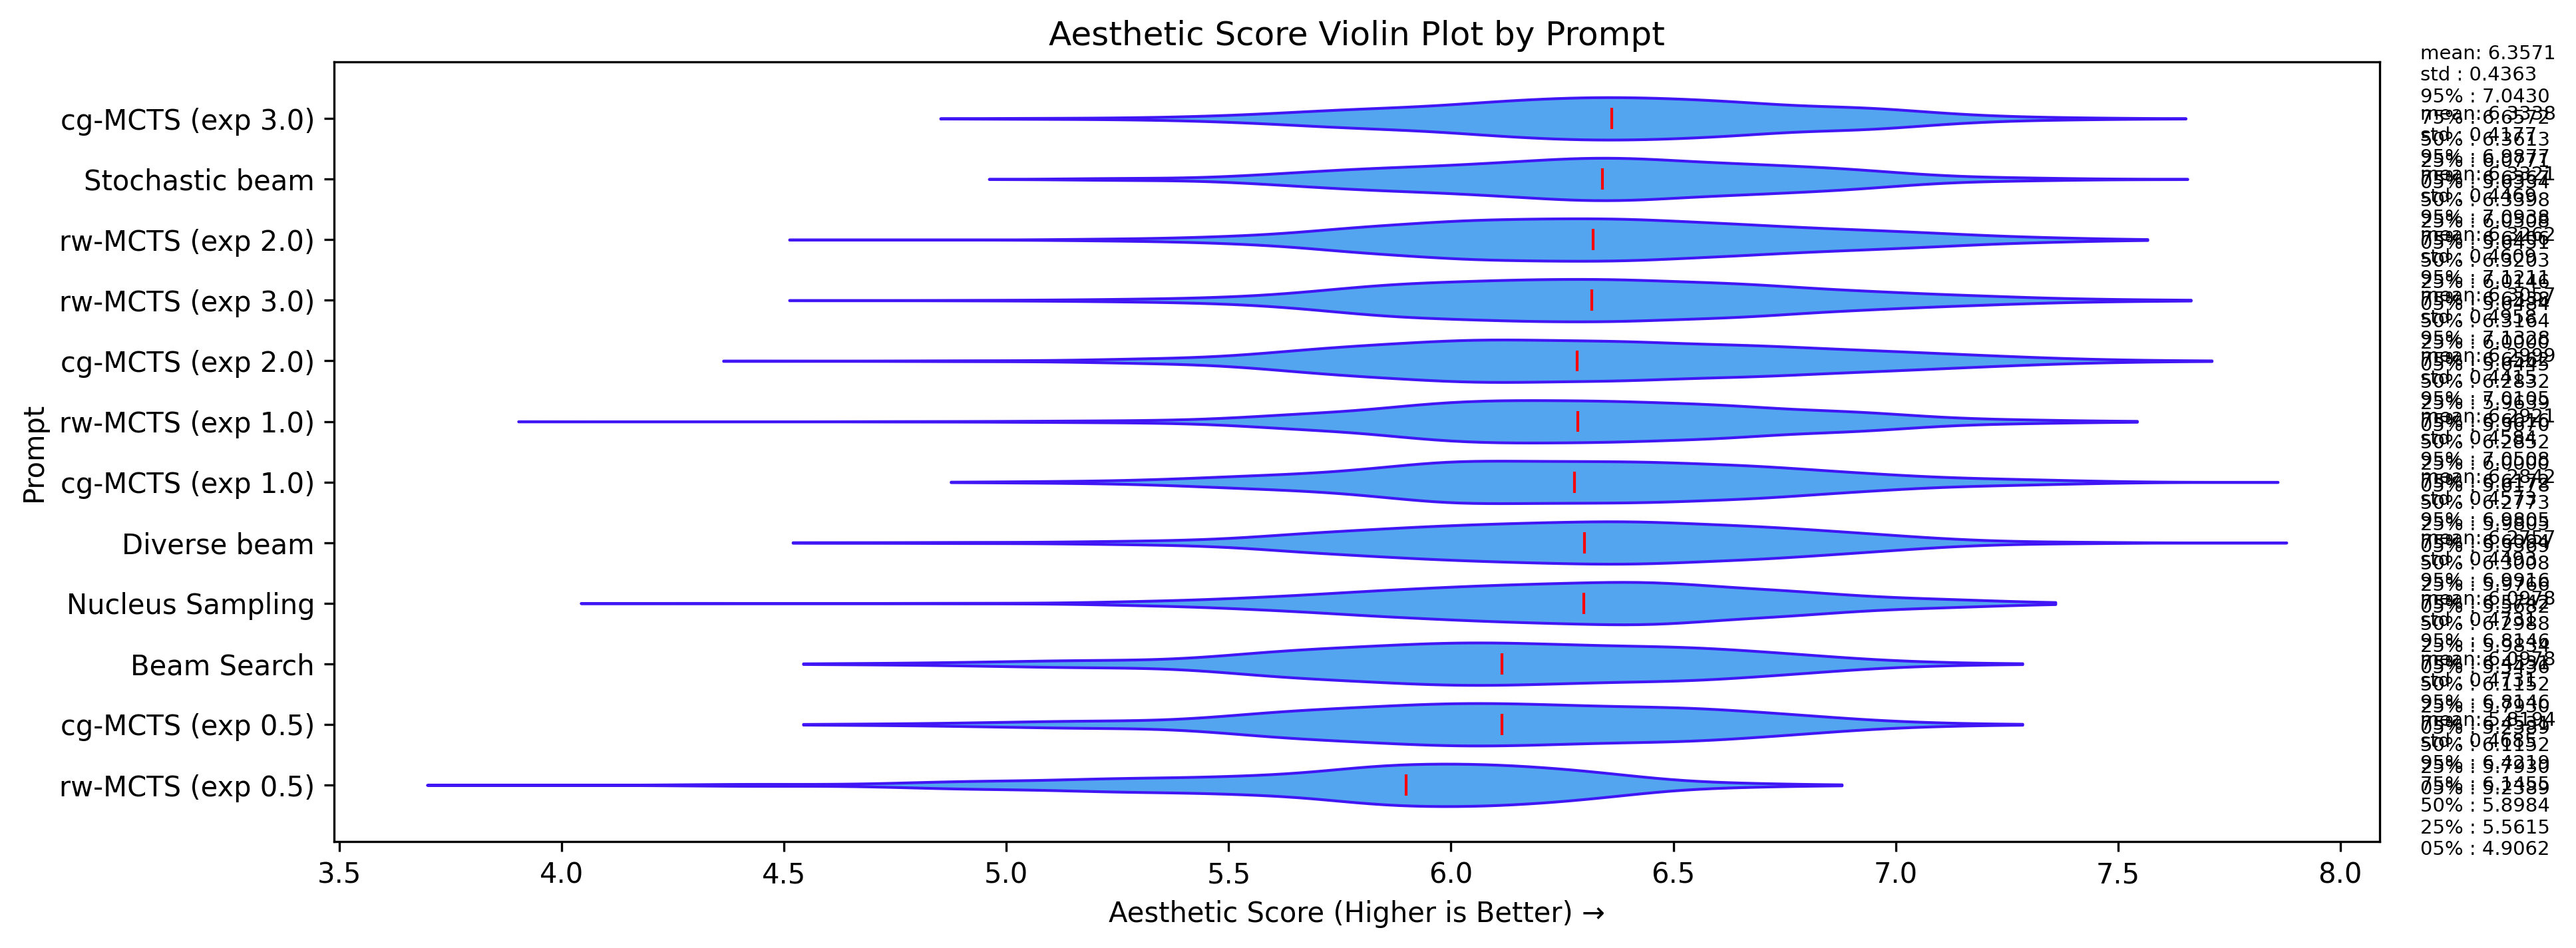


Quantiles for each model:
model                  
rw-MCTS (exp 0.5)  0.05    4.906250
                   0.25    5.561523
                   0.50    5.898438
                   0.75    6.145508
                   0.95    6.421875
cg-MCTS (exp 0.5)  0.05    5.238867
                   0.25    5.792969
                   0.50    6.115234
                   0.75    6.453125
                   0.95    6.814648
Beam Search        0.05    5.238867
                   0.25    5.792969
                   0.50    6.115234
                   0.75    6.453125
                   0.95    6.814648
Nucleus Sampling   0.05    5.543555
                   0.25    5.983398
                   0.50    6.298828
                   0.75    6.574219
                   0.95    6.991602
Diverse beam       0.05    5.568164
                   0.25    5.976562
                   0.50    6.300781
                   0.75    6.609375
                   0.95    6.980469
cg-MCTS (exp 1.0)  0.05    5.536914
             

In [25]:
# Calculate statistics for sorting
df_stats = (
    df.groupby("model")
    .agg({"aesthetic_score": ["mean", lambda x: x.mean()]})
    .reset_index()
)
df_stats.columns = ["model", "mean", "aesthetic_score"]

# Choose sorting method (uncomment the desired method)
# df_stats_sorted = df_stats.sort_values('median', ascending=False)
df_stats_sorted = df_stats.sort_values("mean", ascending=False)

# Get the model order
model_order = df_stats_sorted["model"]

# Sort the original dataframe based on the stats
df_sorted = df.set_index("model").loc[model_order].reset_index()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(13, 5), dpi=300)

# Reverse the model categories
df_sorted["model"] = pd.Categorical(
    df_sorted["model"],
    categories=reversed(list(df_sorted["model"].unique())),
    ordered=True,
)

# Define y-scale and positions
y_scale = 1  # Adjust as needed
box_scale = 0.7  # Adjust as needed
positions = [i * y_scale for i in range(len(model_order))]

# Prepare data for violin plot
data = [
    df_sorted[df_sorted["model"] == model]["aesthetic_score"].values
    for model in df_sorted["model"].cat.categories
]

# Create the horizontal violin plot using the sorted data
violin = ax.violinplot(
    dataset=data,
    positions=positions,
    vert=False,
    widths=[box_scale] * len(model_order),
    showmeans=False,
    showextrema=False,
    showmedians=True,
    bw_method=None,
)

# Customize the violin plots
for pc in violin["bodies"]:
    pc.set_facecolor("#54A5F0")  # Same color as 'boxes' in boxplot
    pc.set_edgecolor("#4016F5")  # Same color as 'whiskers' in boxplot
    pc.set_alpha(1)

# Customize the median lines
violin["cmedians"].set_color("red")
violin["cmedians"].set_linewidth(1)

# Customize the plot
ax.set_title("Aesthetic Score Violin Plot by Prompt")
ax.set_ylabel("Prompt")
ax.set_xlabel("Aesthetic Score (Higher is Better) →")

# Set y-ticks
ax.set_yticks(positions)
ax.set_yticklabels(df_sorted["model"].cat.categories)

# Remove the automatically generated suptitle
plt.suptitle("")

# Adjust the x-limits and x-ticks
mean = df_sorted["aesthetic_score"].mean()
std = df_sorted["aesthetic_score"].std()
# ax.set_xlim(mean - 1.35 * std, mean + 1.35 * std)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))

# Calculate and add quantile information
quantiles = df_sorted.groupby("model")["aesthetic_score"].quantile(
    [0.05, 0.25, 0.5, 0.75, 0.95]
)
means = df_sorted.groupby("model")["aesthetic_score"].mean()
stds = df_sorted.groupby("model")["aesthetic_score"].std()

# Annotate the plot with quantile information
for i, model in enumerate(df_sorted["model"].cat.categories):
    quantile_text = (
        f"mean: {means.loc[model]:.4f}\n"
        f"std : {stds.loc[model]:.4f}\n"
        f"95% : {quantiles.loc[model, 0.95]:.4f}\n"
        f"75% : {quantiles.loc[model, 0.75]:.4f}\n"
        f"50% : {quantiles.loc[model, 0.50]:.4f}\n"
        f"25% : {quantiles.loc[model, 0.25]:.4f}\n"
        f"05% : {quantiles.loc[model, 0.05]:.4f}"
    )
    ax.annotate(
        quantile_text,
        xy=(1.02, positions[i]),
        xycoords=("axes fraction", "data"),
        va="center",
        ha="left",
        fontsize=7,
    )

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Log quantile information
print("\nQuantiles for each model:")
print(quantiles)

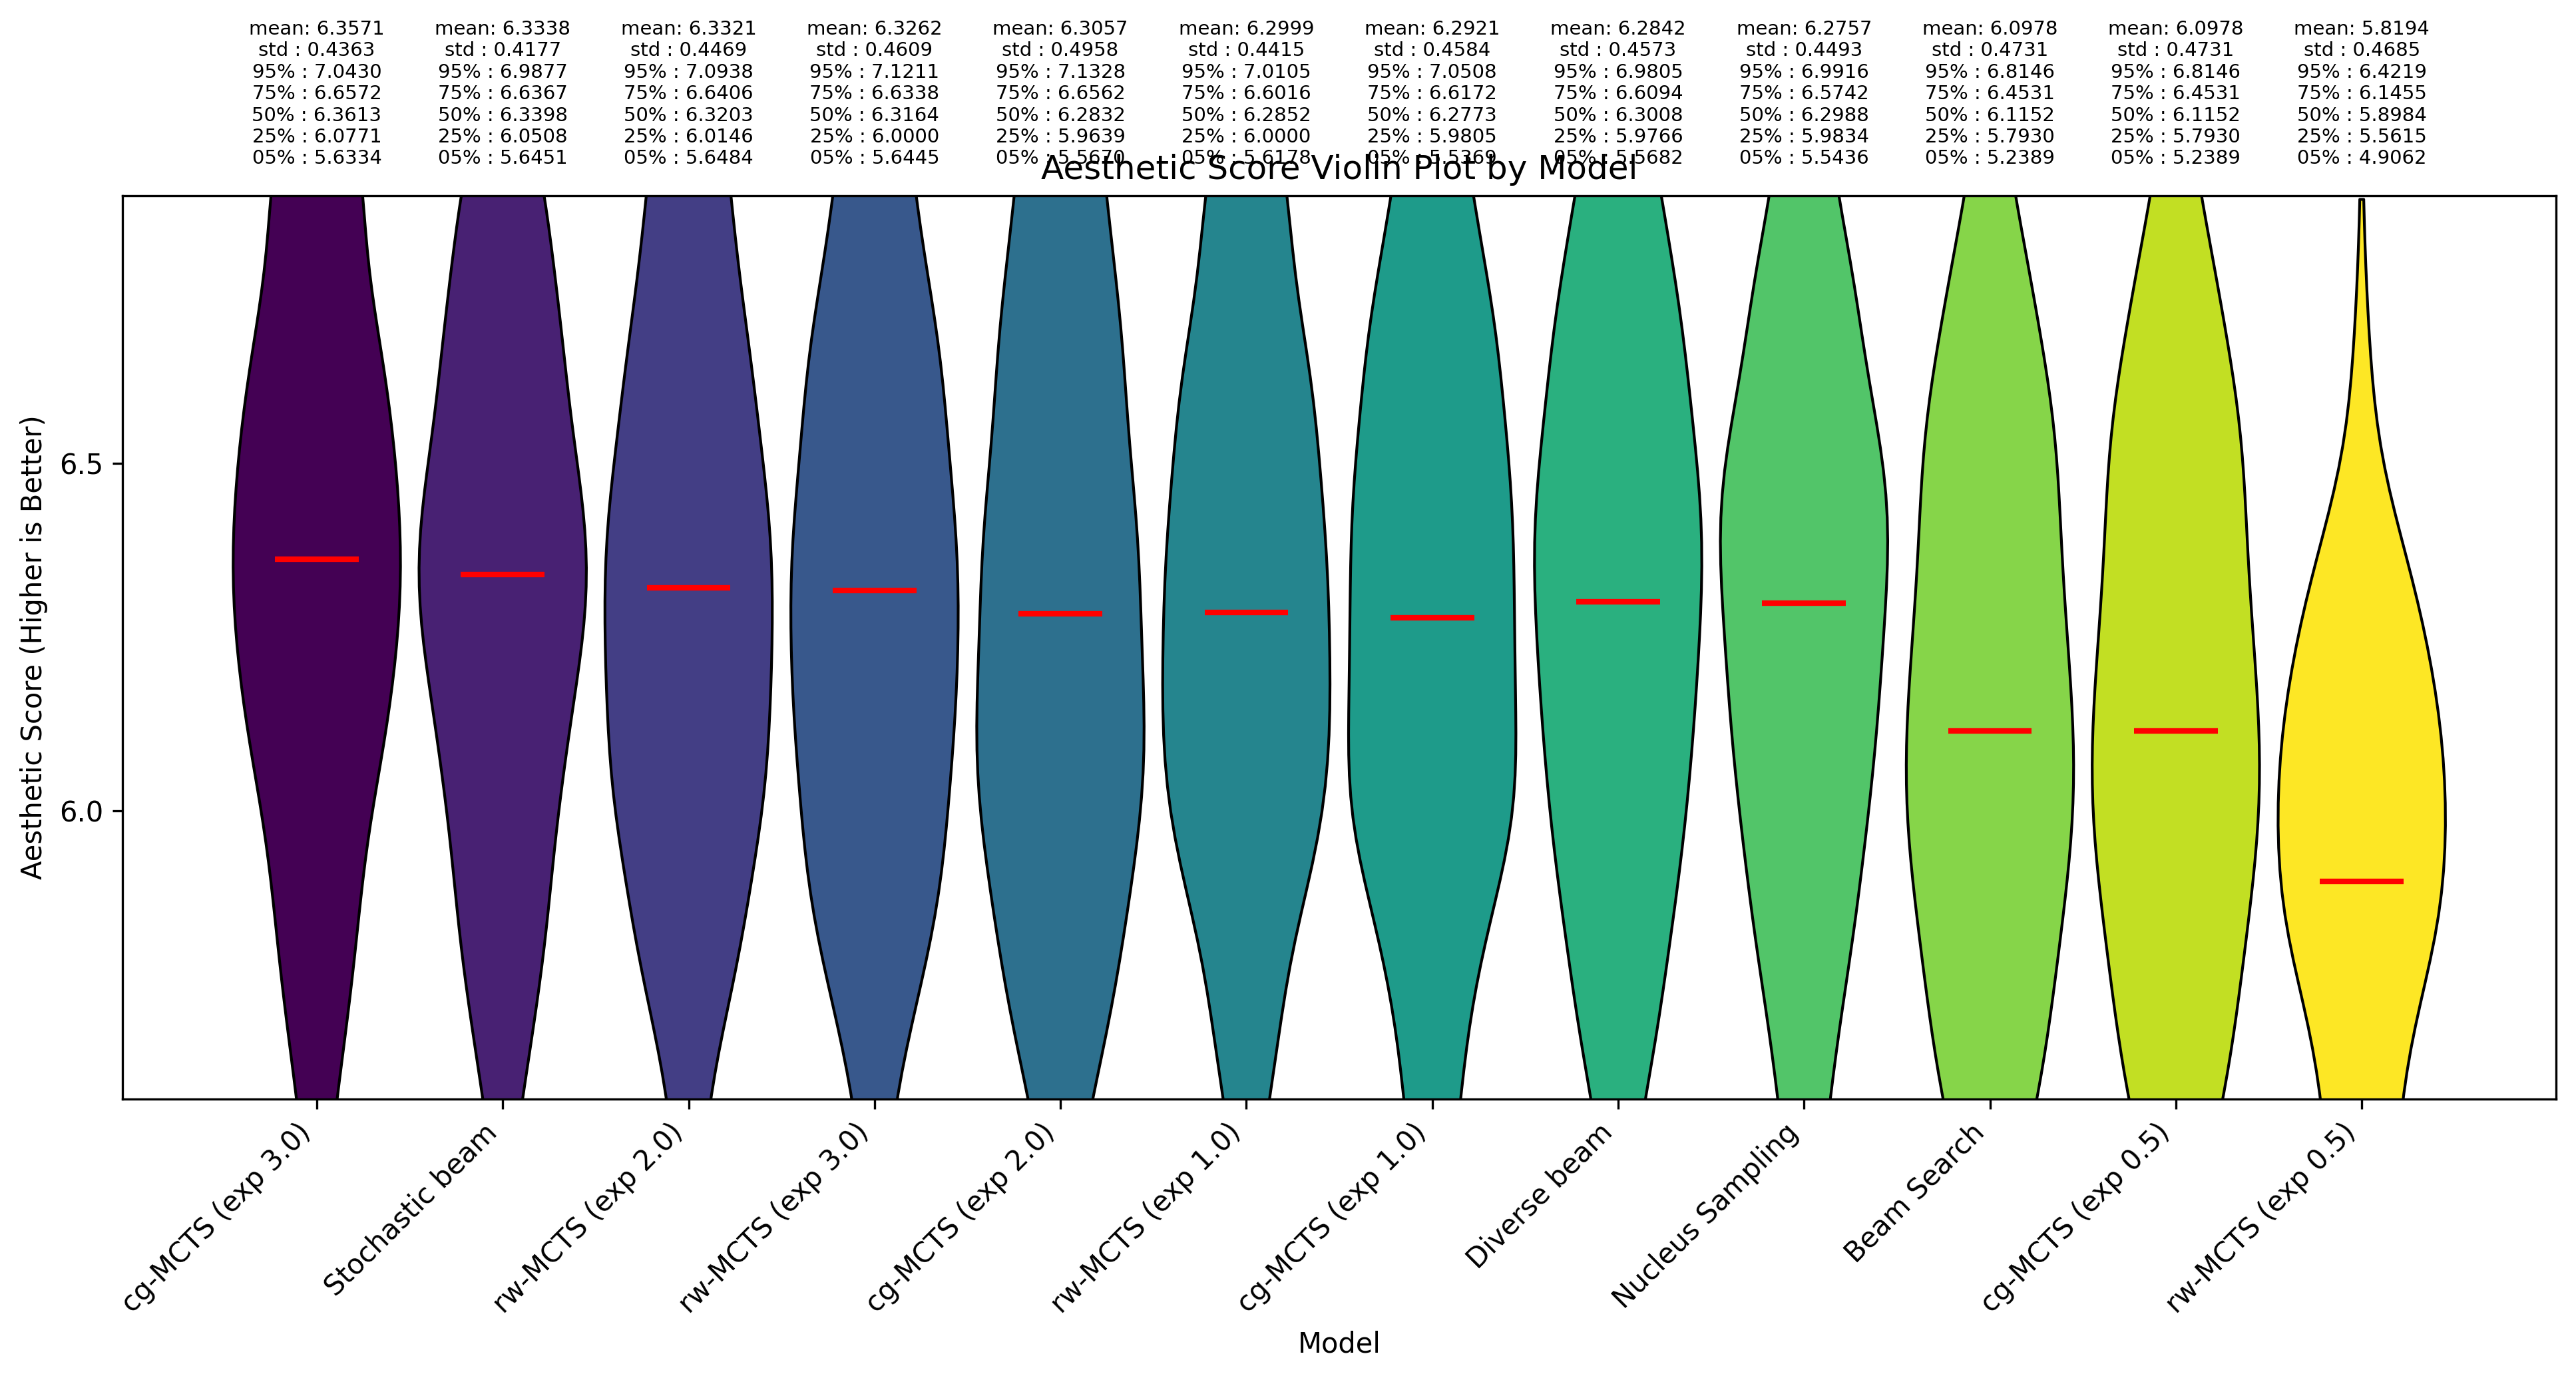


Quantiles for each model:
model                  
Beam Search        0.05    5.238867
                   0.25    5.792969
                   0.50    6.115234
                   0.75    6.453125
                   0.95    6.814648
Diverse beam       0.05    5.568164
                   0.25    5.976562
                   0.50    6.300781
                   0.75    6.609375
                   0.95    6.980469
Nucleus Sampling   0.05    5.543555
                   0.25    5.983398
                   0.50    6.298828
                   0.75    6.574219
                   0.95    6.991602
Stochastic beam    0.05    5.645117
                   0.25    6.050781
                   0.50    6.339844
                   0.75    6.636719
                   0.95    6.987695
cg-MCTS (exp 0.5)  0.05    5.238867
                   0.25    5.792969
                   0.50    6.115234
                   0.75    6.453125
                   0.95    6.814648
cg-MCTS (exp 1.0)  0.05    5.536914
             

In [26]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Calculate statistics for sorting
df_stats = (
    df.groupby("model")
    .agg({"aesthetic_score": ["mean", lambda x: x.mean()]})
    .reset_index()
)
df_stats.columns = ["model", "mean", "aesthetic_score"]

# Choose sorting method (uncomment the desired method)
# df_stats_sorted = df_stats.sort_values('median', ascending=False)
df_stats_sorted = df_stats.sort_values("mean", ascending=False)

# Get the model order
model_order = df_stats_sorted["model"].tolist()

# Sort the original dataframe based on the stats
df_sorted = df.set_index("model").loc[model_order].reset_index()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(13, 7), dpi=300)

# Define x-scale and positions
x_scale = 1  # Adjust as needed
positions = [i * x_scale for i in range(len(model_order))]

# Prepare data for violin plot
data = [
    df_sorted[df_sorted["model"] == model]["aesthetic_score"].values
    for model in model_order
]

# Generate a color map for the models
colors = cm.viridis(np.linspace(0, 1, len(model_order)))

# Create the vertical violin plot using the sorted data
violin = ax.violinplot(
    dataset=data,
    positions=positions,
    vert=True,
    widths=0.9,  # Adjust as needed
    showmeans=False,
    showextrema=False,
    showmedians=True,
    bw_method=None,
)

# Customize the violin plots with different colors
for i, pc in enumerate(violin["bodies"]):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor("black")
    pc.set_alpha(1)

# Customize the median lines
violin["cmedians"].set_color("red")
violin["cmedians"].set_linewidth(2)

# Customize the plot
ax.set_title("Aesthetic Score Violin Plot by Model")
ax.set_xlabel("Model")
ax.set_ylabel("Aesthetic Score (Higher is Better)")

# Set x-ticks
ax.set_xticks(positions)
ax.set_xticklabels(model_order, rotation=45, ha="right")

# Adjust the y-limits and y-ticks
mean = df_sorted["aesthetic_score"].mean()
std = df_sorted["aesthetic_score"].std()
ax.set_ylim(mean - 1.35 * std, mean + 1.35 * std)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

# Calculate and add quantile information
quantiles = df_sorted.groupby("model")["aesthetic_score"].quantile(
    [0.05, 0.25, 0.5, 0.75, 0.95]
)
means = df_sorted.groupby("model")["aesthetic_score"].mean()
stds = df_sorted.groupby("model")["aesthetic_score"].std()

# Annotate the plot with quantile information
for i, model in enumerate(model_order):
    quantile_text = (
        f"mean: {means.loc[model]:.4f}\n"
        f"std : {stds.loc[model]:.4f}\n"
        f"95% : {quantiles.loc[model, 0.95]:.4f}\n"
        f"75% : {quantiles.loc[model, 0.75]:.4f}\n"
        f"50% : {quantiles.loc[model, 0.50]:.4f}\n"
        f"25% : {quantiles.loc[model, 0.25]:.4f}\n"
        f"05% : {quantiles.loc[model, 0.05]:.4f}"
    )
    ax.annotate(
        quantile_text,
        xy=(positions[i], ax.get_ylim()[1]),
        xytext=(0, 10),
        textcoords="offset points",
        va="bottom",
        ha="center",
        fontsize=7,
        rotation=0,
    )

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Log quantile information
print("\nQuantiles for each model:")
print(quantiles)

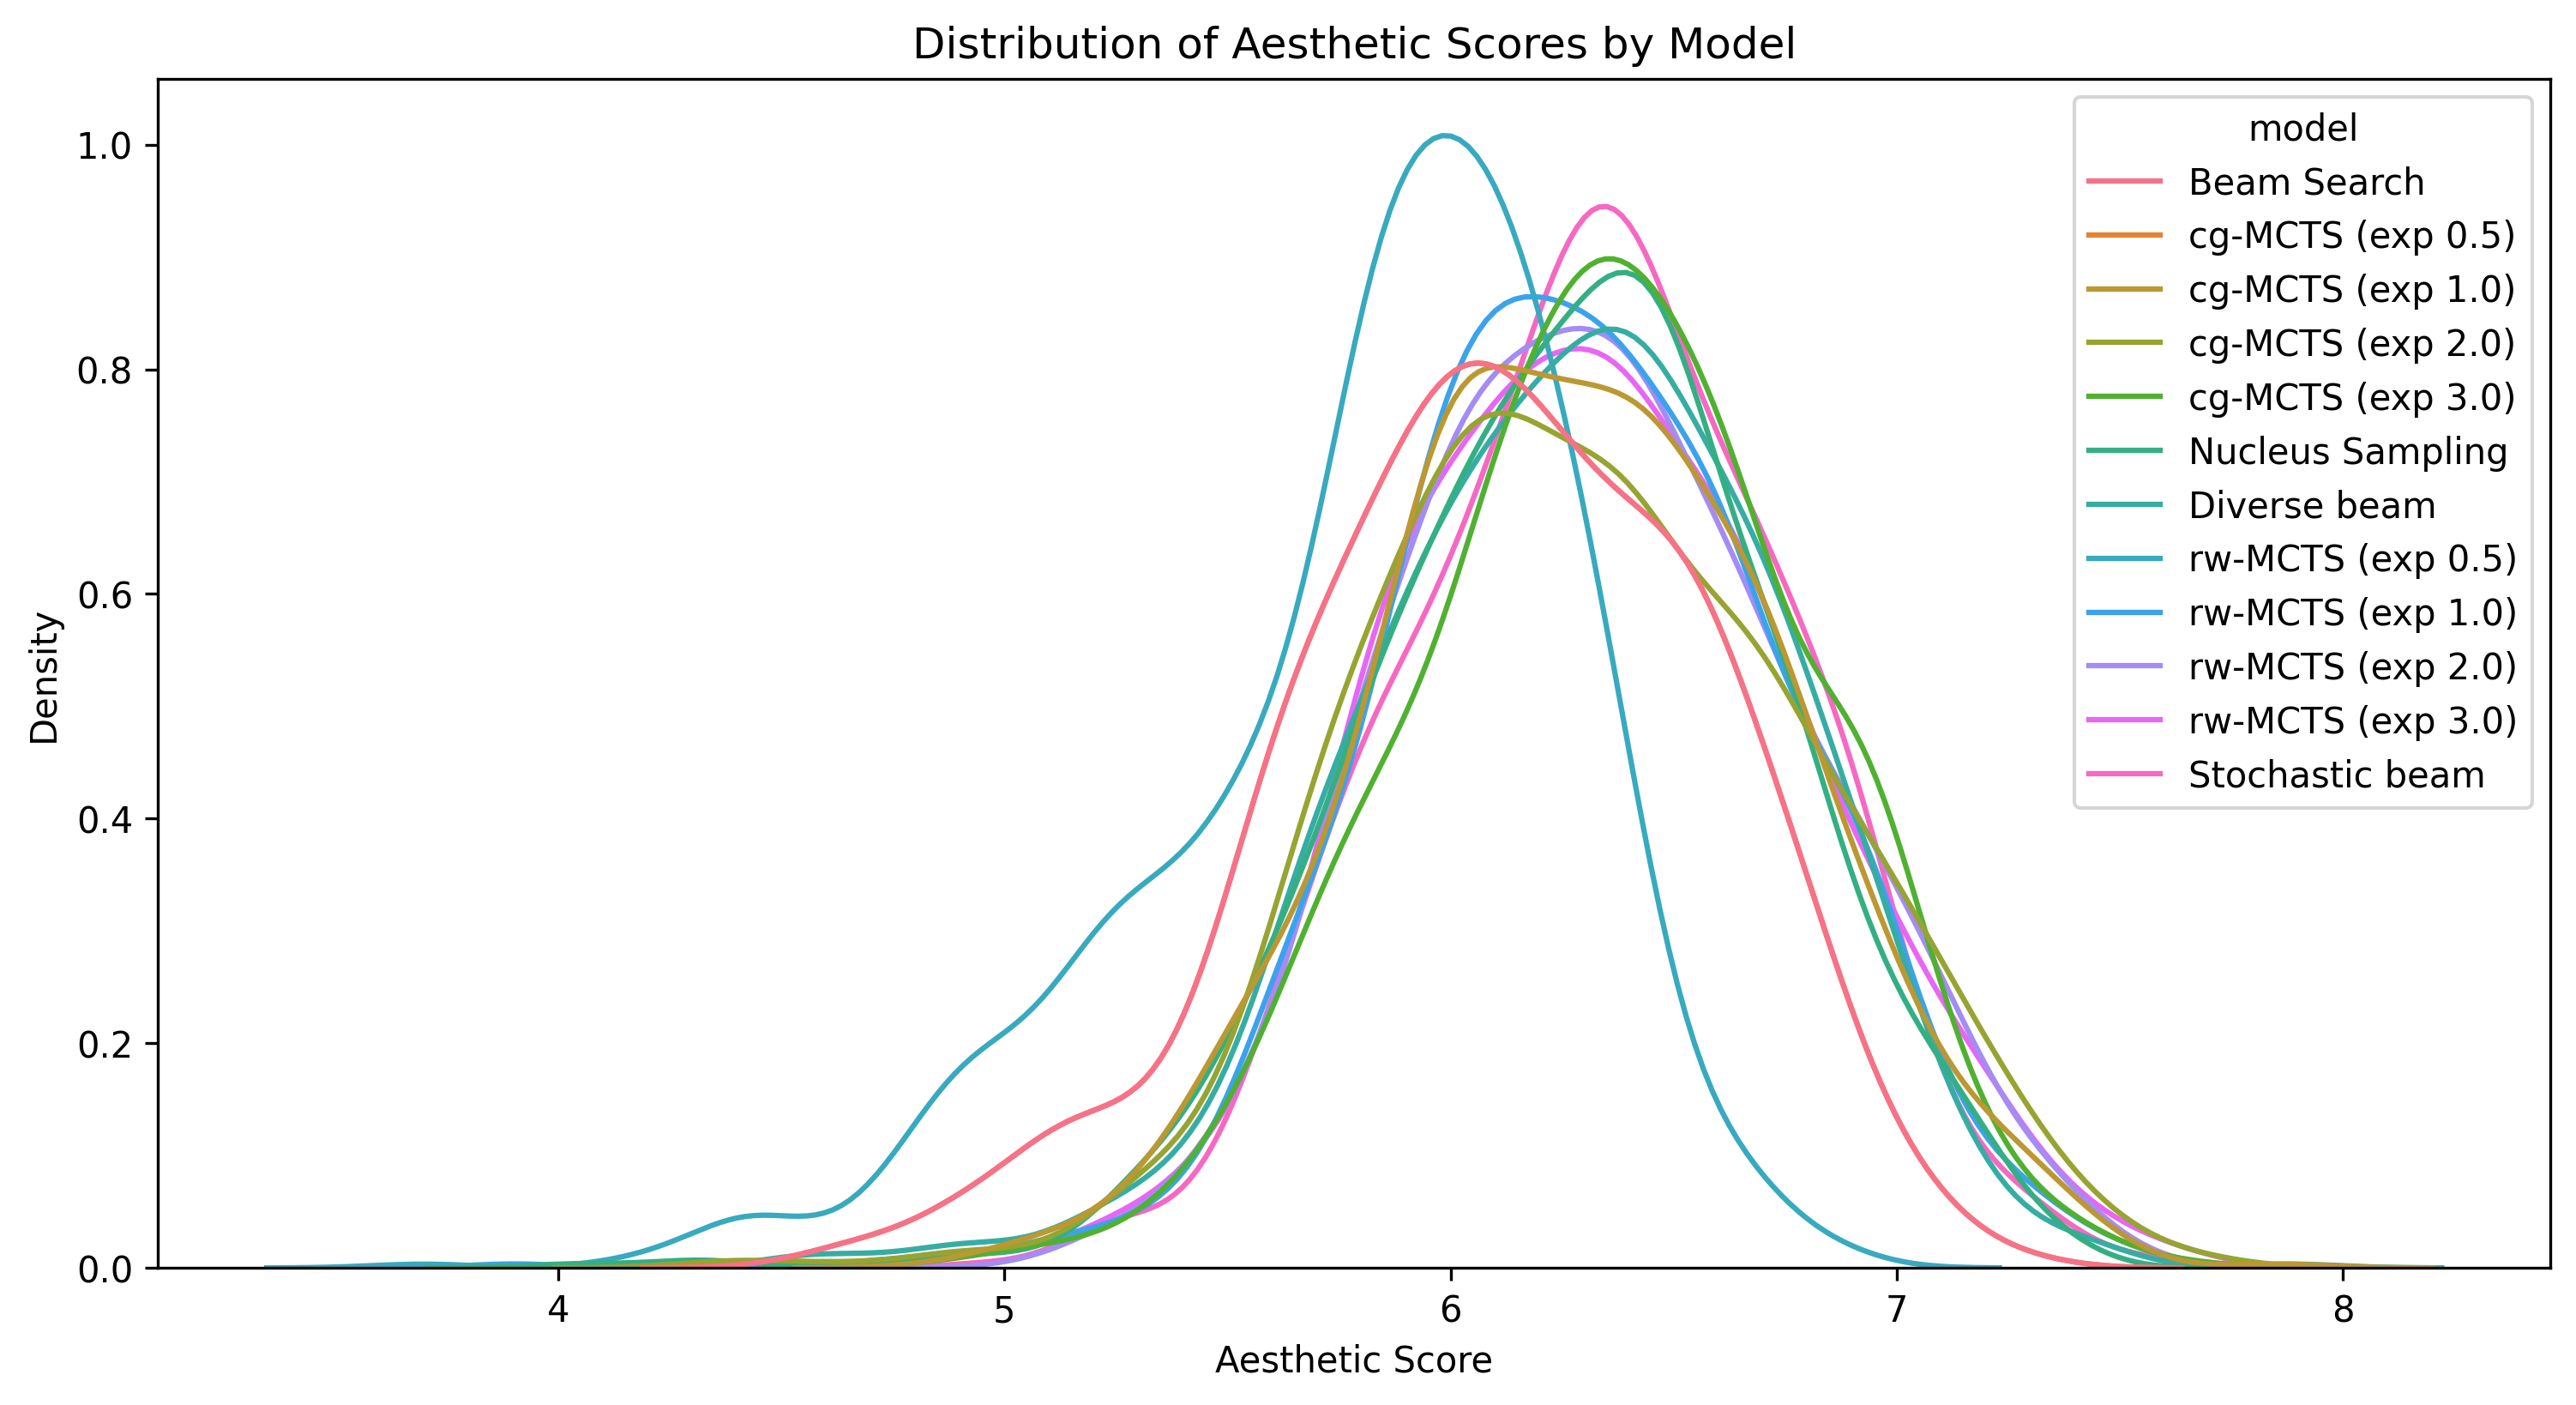

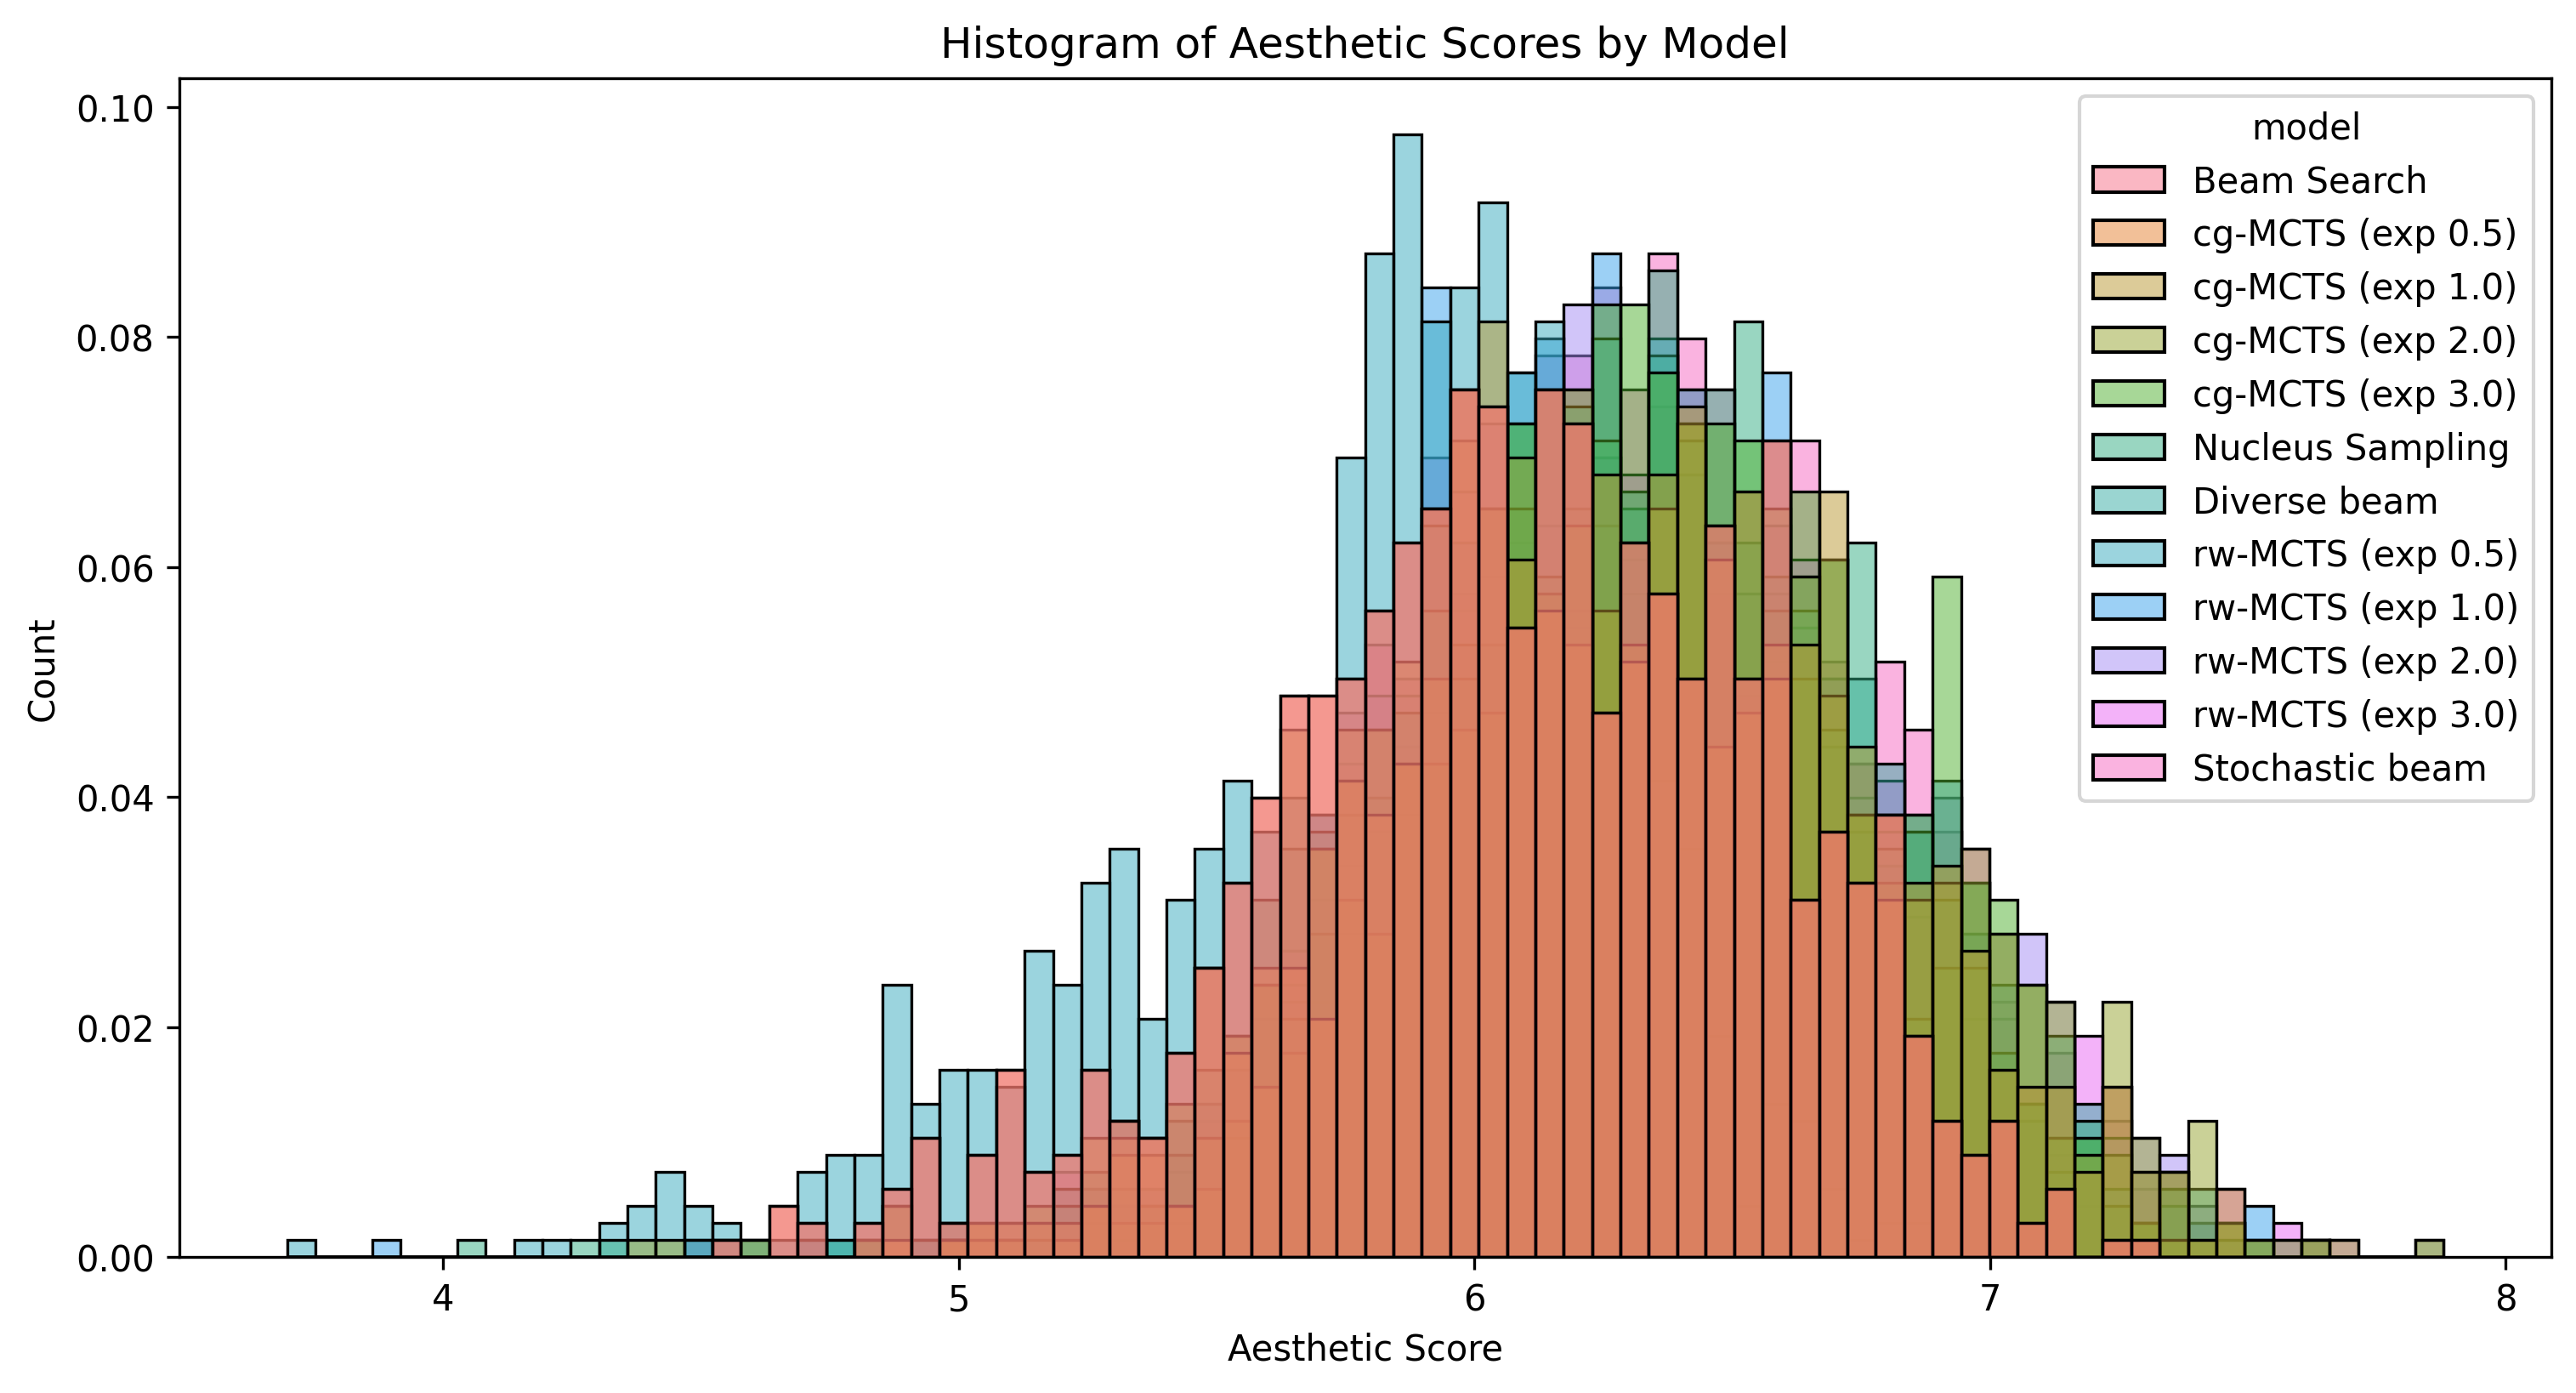

In [27]:
import seaborn as sns

# Seaborn distribution plot
plt.figure(figsize=(12, 6), dpi=300)
sns.kdeplot(data=df, x="aesthetic_score", hue="model", common_norm=False)
plt.title("Distribution of Aesthetic Scores by Model")
plt.xlabel("Aesthetic Score")
plt.ylabel("Density")

# Alternative: Histogram
plt.figure(figsize=(12, 6), dpi=300)
sns.histplot(data=df, x="aesthetic_score", hue="model", stat="density", alpha=0.5)
plt.title("Histogram of Aesthetic Scores by Model")
plt.xlabel("Aesthetic Score")
plt.ylabel("Count")

plt.show()